In [1]:
import geopandas as gpd 

In [2]:
segmentized_sidewalks = gpd.read_parquet('../data/nyc/processed/segmentized_with_widths.parquet')

In [7]:
segmentized_sidewalks

,width,geometry
0,15.845369,POINT (917063.723 121024.064)
1,15.845369,POINT (917051.638 121014.569)
2,9.071345,POINT (917051.638 121014.569)
3,9.071345,POINT (917021.592 120979.899)
4,9.071345,POINT (916991.545 120945.229)
...,...,...
2271118,13.724874,POINT (1060643.084 218461.672)
2271119,13.724874,POINT (1060614.079 218422.163)
2271120,13.724874,POINT (1060585.073 218382.654)
2271121,12.760880,POINT (1060585.073 218382.654)


In [12]:
# drop anything below 0.1th percentile and above 99.9th percentile of width 
segmentized_sidewalks = segmentized_sidewalks[segmentized_sidewalks['width'] > segmentized_sidewalks['width'].quantile(0.001)]
segmentized_sidewalks = segmentized_sidewalks[segmentized_sidewalks['width'] < segmentized_sidewalks['width'].quantile(0.999)]

In [5]:
import matplotlib.pyplot as plt 

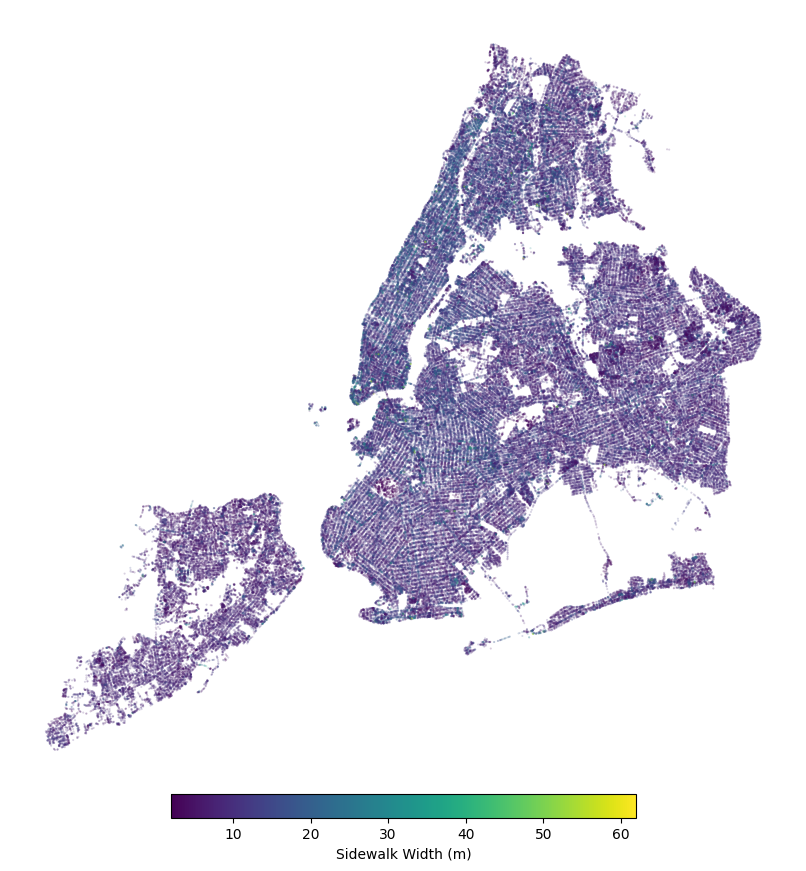

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

segmentized_sidewalks.sample(frac=0.1).plot(ax=ax, column='width', cmap='viridis', legend=True, markersize=0.25, alpha=0.2,
    legend_kwds={'label': "Sidewalk Width (m)", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.01})

ax.axis('off')

plt.savefig('./_debug_figs/segmentized_sidewalks.png', dpi=300, bbox_inches='tight', pad_inches=0.1)